In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pyflct
from astropy.io import fits

In [2]:
from matplotlib import font_manager

font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
Vx_conv40 = fits.open("pyFLCT_fwhm_600_dt_30_CONV40_tracked.fits")[0].data
Vy_conv40 = fits.open("pyFLCT_fwhm_600_dt_30_CONV40_tracked.fits")[1].data

In [4]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [5]:
from scipy.ndimage import gaussian_filter

<h2>FLCT velocities derived from line center vs velocities at $\tau$ = 0.0001</h2>

In [6]:
Vx_log4 = fits.open("Velocities_TAU_0_0001.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_log4 = fits.open("Velocities_TAU_0_0001.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_log4 = Vx_log4.transpose(0, 2, 1)
Vy_log4 = Vy_log4.transpose(0, 2, 1)

In [7]:
Vx_log4 = Vx_log4.reshape(361, 768, 2, 768, 2)
Vy_log4 = Vy_log4.reshape(361, 768, 2, 768, 2)

In [8]:
Vx_bin_log4 = Vx_log4.mean(axis = 4).mean(axis = 2)
Vy_bin_log4 = Vy_log4.mean(axis = 4).mean(axis = 2)

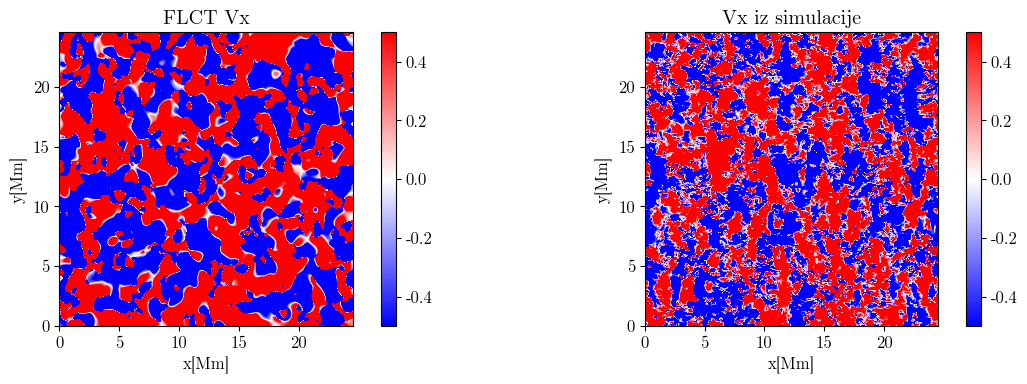

In [9]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin_log4[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv40_tau0001.png", bbox_inches = 'tight', dpi = 100)

In [10]:
from scipy.stats import pearsonr

In [11]:
Vx_mean_sim_log4 = temporal_avg(Vx_bin_log4, 0, 60)
Vx_mean_sim_log4 = Vx_mean_sim_log4/1E5

Vy_mean_sim_log4 = temporal_avg(Vy_bin_log4, 0, 60)
Vy_mean_sim_log4 = Vy_mean_sim_log4/1E5

In [12]:
Vx_conv40_600 = temporal_avg(Vx_conv40, 0, 60)
Vy_conv40_600 = temporal_avg(Vy_conv40, 0, 60)

In [13]:
Vxlog4_filtered22 = gaussian_filter(Vx_mean_sim_log4, 22.5, mode = "wrap")
Vylog4_filtered22 = gaussian_filter(Vy_mean_sim_log4, 22.5, mode = "wrap")

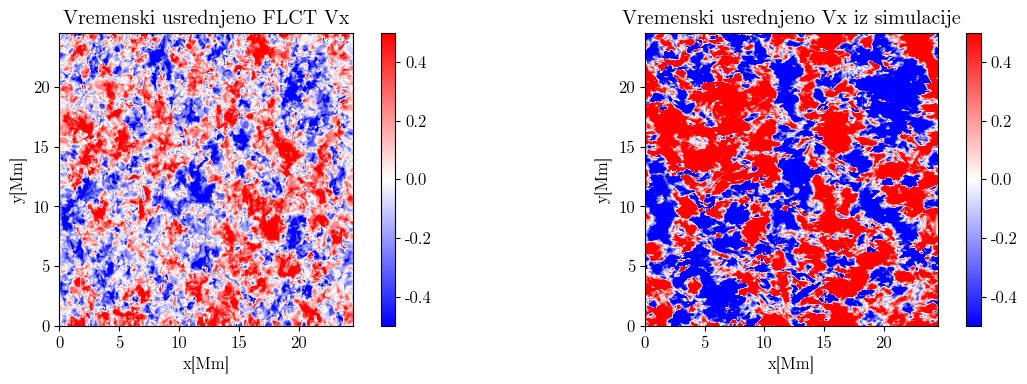

In [14]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim_log4[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv40_tau0001.png", bbox_inches = 'tight', dpi = 100)

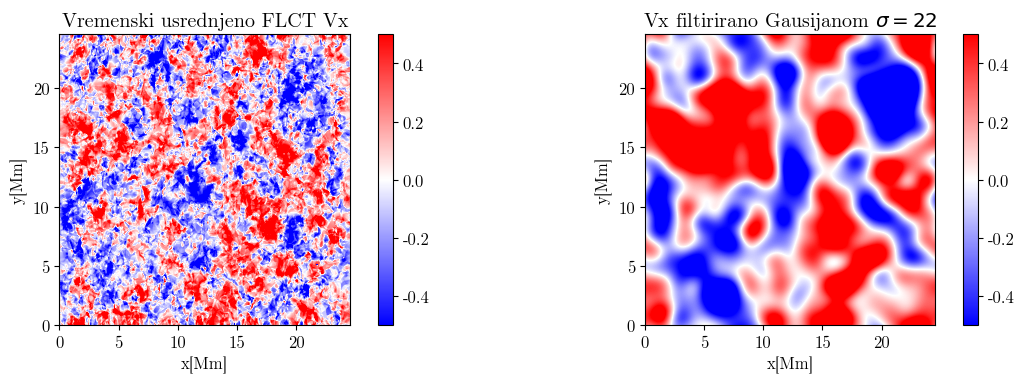

In [15]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxlog4_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv40_tau0001.png", bbox_inches = 'tight', dpi = 100)

In [16]:
rxlog4_conv40_1 = pearsonr(Vx_conv40[0].flatten(), (Vx_bin_log4[0]/1E5).flatten()) 
print(rxlog4_conv40_1)

PearsonRResult(statistic=0.07137000034233076, pvalue=0.0)


In [17]:
rxlog4_conv40_2 = pearsonr(Vx_conv40_600.flatten(), Vx_mean_sim_log4.flatten()) 
print(rxlog4_conv40_2)

PearsonRResult(statistic=0.123042548178976, pvalue=0.0)


In [18]:
rxlog4_conv40_3 = pearsonr(Vx_conv40_600.flatten(), Vxlog4_filtered22.flatten()) 
print(rxlog4_conv40_3)

PearsonRResult(statistic=0.18189111092296534, pvalue=0.0)


In [19]:
rylog4_conv40_1 = pearsonr(Vy_conv40[0].flatten(), (Vy_bin_log4[0]/1E5).flatten()) 
print(rylog4_conv40_1)

PearsonRResult(statistic=0.010378169994356496, pvalue=1.5786457125199853e-15)


In [20]:
rylog4_conv40_2 = pearsonr(Vy_conv40_600.flatten(), Vy_mean_sim_log4.flatten()) 
print(rylog4_conv40_2)

PearsonRResult(statistic=0.06942312865317744, pvalue=0.0)


In [21]:
rylog4_conv40_3 = pearsonr(Vy_conv40_600.flatten(), Vylog4_filtered22.flatten()) 
print(rylog4_conv40_3)

PearsonRResult(statistic=0.08698033774172098, pvalue=0.0)


<h2>FLCT velocities derived from line center vs velocities at $\tau$ = 0.001</h2>

In [22]:
Vx_log3 = fits.open("Velocities_TAU_0_001.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_log3 = fits.open("Velocities_TAU_0_001.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_log3 = Vx_log3.transpose(0, 2, 1)
Vy_log3 = Vy_log3.transpose(0, 2, 1)

In [23]:
Vx_log3 = Vx_log3.reshape(361, 768, 2, 768, 2)
Vy_log3 = Vy_log3.reshape(361, 768, 2, 768, 2)

In [24]:
Vx_bin_log3 = Vx_log3.mean(axis = 4).mean(axis = 2)
Vy_bin_log3 = Vy_log3.mean(axis = 4).mean(axis = 2)

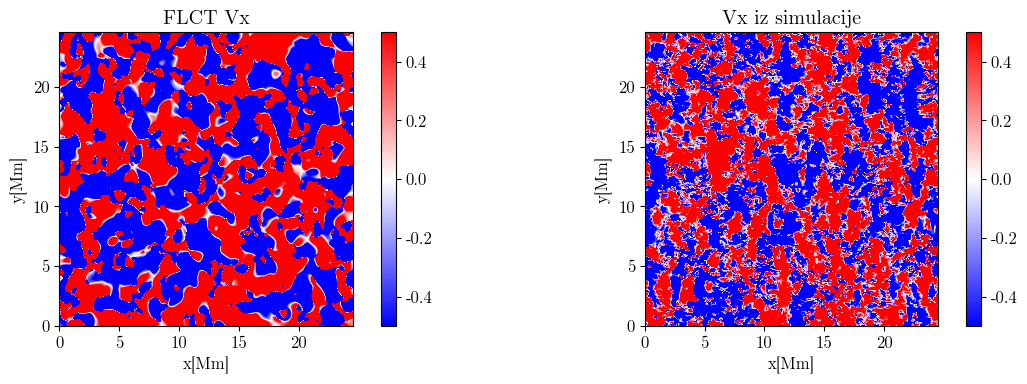

In [25]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin_log4[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv40_tau001.png", bbox_inches = 'tight', dpi = 100)

In [26]:
Vx_mean_sim_log3 = temporal_avg(Vx_bin_log3, 0, 60)
Vx_mean_sim_log3 = Vx_mean_sim_log3/1E5

Vy_mean_sim_log3 = temporal_avg(Vy_bin_log3, 0, 60)
Vy_mean_sim_log3 = Vy_mean_sim_log3/1E5

In [27]:
Vxlog3_filtered22 = gaussian_filter(Vx_mean_sim_log3, 22.5, mode = "wrap")
Vylog3_filtered22 = gaussian_filter(Vy_mean_sim_log3, 22.5, mode = "wrap")

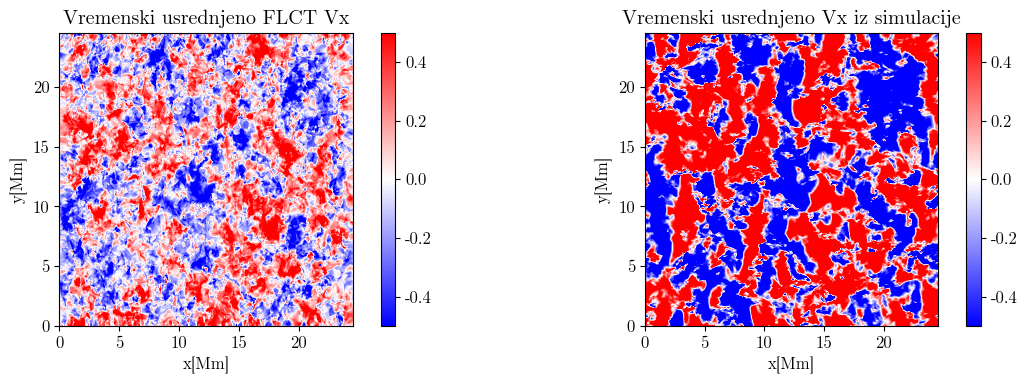

In [28]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim_log3[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv40_tau001.png", bbox_inches = 'tight', dpi = 100)

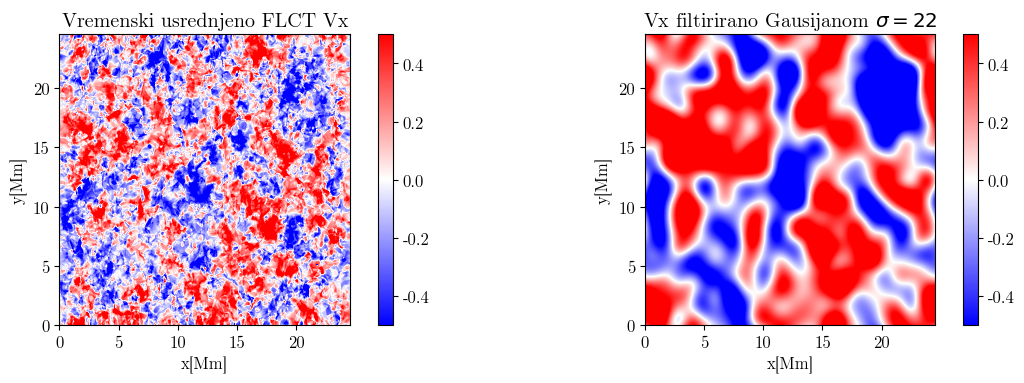

In [29]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxlog3_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv40_tau001.png", bbox_inches = 'tight', dpi = 100)

In [30]:
rxlog3_conv40_1 = pearsonr(Vx_conv40[0].flatten(), (Vx_bin_log3[0]/1E5).flatten()) 
print(rxlog3_conv40_1)

PearsonRResult(statistic=0.15825248769428474, pvalue=0.0)


In [31]:
rxlog3_conv40_2 = pearsonr(Vx_conv40_600.flatten(), Vx_mean_sim_log3.flatten()) 
print(rxlog3_conv40_2)

PearsonRResult(statistic=0.20902659467987394, pvalue=0.0)


In [32]:
rxlog3_conv40_3 = pearsonr(Vx_conv40_600.flatten(), Vxlog3_filtered22.flatten()) 
print(rxlog3_conv40_3)

PearsonRResult(statistic=0.2682083864883202, pvalue=0.0)


In [33]:
rylog3_conv40_1 = pearsonr(Vy_conv40[0].flatten(), (Vy_bin_log3[0]/1E5).flatten()) 
print(rylog3_conv40_1)

PearsonRResult(statistic=0.0628532030033459, pvalue=0.0)


In [34]:
rylog3_conv40_2 = pearsonr(Vy_conv40_600.flatten(), Vy_mean_sim_log3.flatten()) 
print(rylog3_conv40_2)

PearsonRResult(statistic=0.22411400551364796, pvalue=0.0)


In [35]:
rylog3_conv40_3 = pearsonr(Vy_conv40_600.flatten(), Vylog3_filtered22.flatten()) 
print(rylog3_conv40_3)

PearsonRResult(statistic=0.26599055836092667, pvalue=0.0)


<h2>FLCT velocities derived from line center vs velocities at $\tau$ = 0.01</h2>

In [36]:
Vx_log2 = fits.open("Velocities_TAU_0_01.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_log2 = fits.open("Velocities_TAU_0_01.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_log2 = Vx_log2.transpose(0, 2, 1)
Vy_log2 = Vy_log2.transpose(0, 2, 1)

In [37]:
Vx_log2 = Vx_log2.reshape(361, 768, 2, 768, 2)
Vy_log2 = Vy_log2.reshape(361, 768, 2, 768, 2)

In [38]:
Vx_bin_log2 = Vx_log2.mean(axis = 4).mean(axis = 2)
Vy_bin_log2 = Vy_log2.mean(axis = 4).mean(axis = 2)

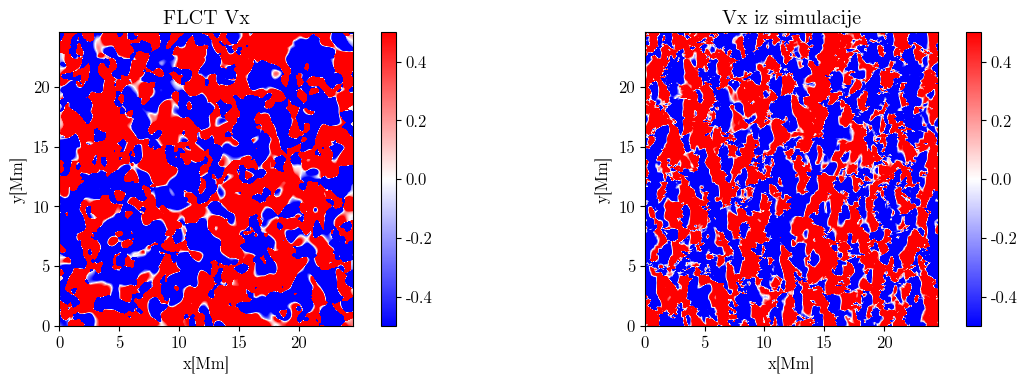

In [39]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin_log2[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv40_tau01.png", bbox_inches = 'tight', dpi = 100)

In [40]:
Vx_mean_sim_log2 = temporal_avg(Vx_bin_log2, 0, 60)
Vx_mean_sim_log2 = Vx_mean_sim_log2/1E5

Vy_mean_sim_log2 = temporal_avg(Vy_bin_log2, 0, 60)
Vy_mean_sim_log2 = Vy_mean_sim_log2/1E5

In [41]:
Vxlog2_filtered22 = gaussian_filter(Vx_mean_sim_log2, 22.5, mode = "wrap")
Vylog2_filtered22 = gaussian_filter(Vy_mean_sim_log2, 22.5, mode = "wrap")

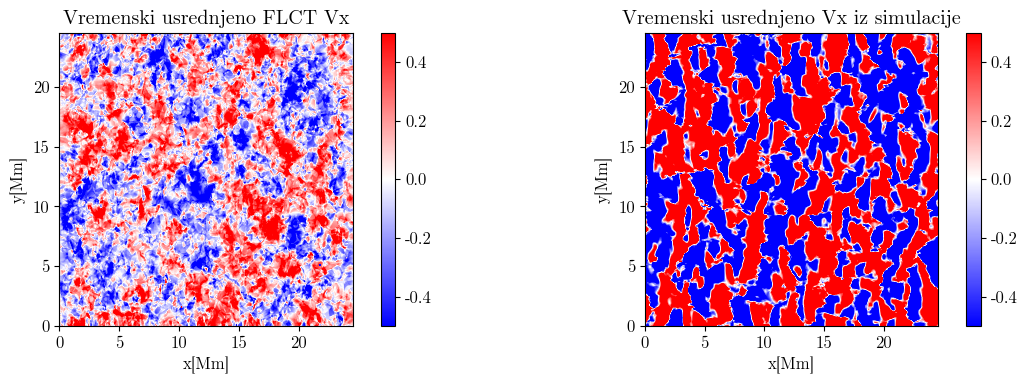

In [42]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim_log2[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv40_tau01.png", bbox_inches = 'tight', dpi = 100)

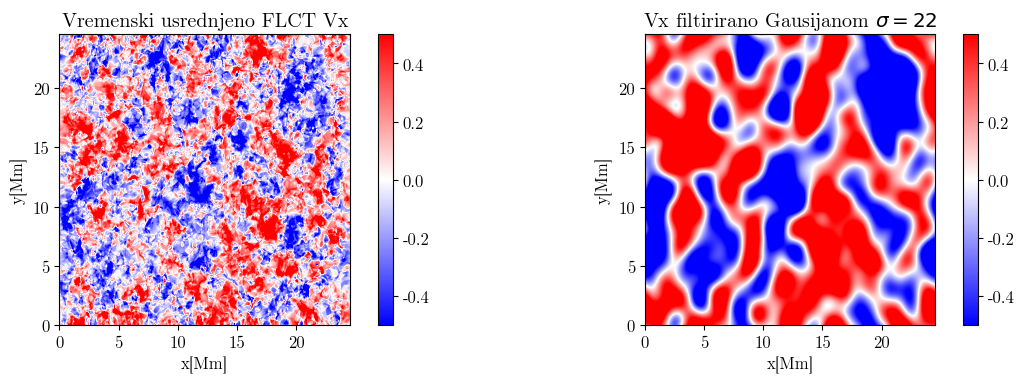

In [43]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxlog2_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv40_tau01.png", bbox_inches = 'tight', dpi = 100)

In [44]:
rxlog2_conv40_1 = pearsonr(Vx_conv40[0].flatten(), (Vx_bin_log2[0]/1E5).flatten()) 
print(rxlog2_conv40_1)

PearsonRResult(statistic=0.22068110959659326, pvalue=0.0)


In [45]:
rxlog2_conv40_2 = pearsonr(Vx_conv40_600.flatten(), Vx_mean_sim_log2.flatten()) 
print(rxlog2_conv40_2)

PearsonRResult(statistic=0.2479757072173536, pvalue=0.0)


In [46]:
rxlog2_conv40_3 = pearsonr(Vx_conv40_600.flatten(), Vxlog2_filtered22.flatten()) 
print(rxlog2_conv40_3)

PearsonRResult(statistic=0.34439669889509816, pvalue=0.0)


In [47]:
rylog2_conv40_1 = pearsonr(Vy_conv40[0].flatten(), (Vy_bin_log2[0]/1E5).flatten()) 
print(rylog2_conv40_1)

PearsonRResult(statistic=0.14692759501795527, pvalue=0.0)


In [48]:
rylog2_conv40_2 = pearsonr(Vy_conv40_600.flatten(), Vy_mean_sim_log2.flatten()) 
print(rylog2_conv40_2)

PearsonRResult(statistic=0.30693907978492, pvalue=0.0)


In [49]:
rylog2_conv40_3 = pearsonr(Vy_conv40_600.flatten(), Vylog2_filtered22.flatten()) 
print(rylog2_conv40_3)

PearsonRResult(statistic=0.436874974962972, pvalue=0.0)


<h2>FLCT velocities derived from line center vs velocities at $\tau$ = 0.1</h2>

In [50]:
Vx_log1 = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_log1 = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_log1 = Vx_log1.transpose(0, 2, 1)
Vy_log1 = Vy_log1.transpose(0, 2, 1)

In [51]:
Vx_log1 = Vx_log1.reshape(361, 768, 2, 768, 2)
Vy_log1 = Vy_log1.reshape(361, 768, 2, 768, 2)

In [52]:
Vx_bin_log1 = Vx_log1.mean(axis = 4).mean(axis = 2)
Vy_bin_log1 = Vy_log1.mean(axis = 4).mean(axis = 2)

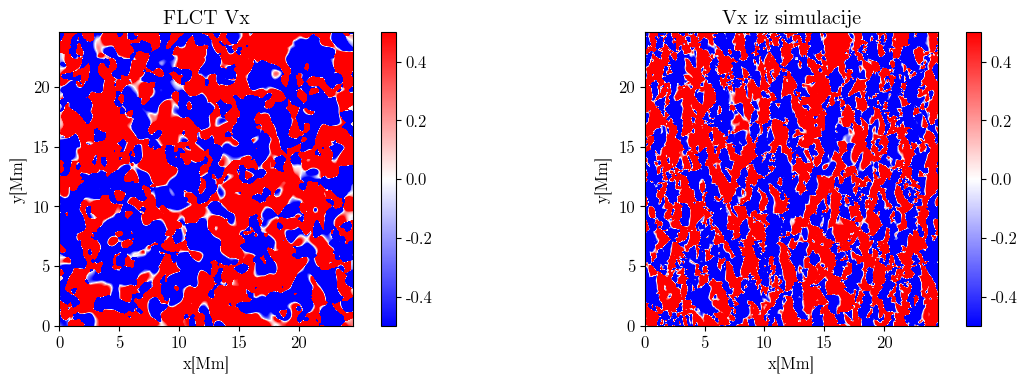

In [53]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin_log1[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv40_tau0_1.png", bbox_inches = 'tight', dpi = 100)

In [54]:
Vx_mean_sim_log1 = temporal_avg(Vx_bin_log1, 0, 60)
Vx_mean_sim_log1 = Vx_mean_sim_log1/1E5

Vy_mean_sim_log1 = temporal_avg(Vy_bin_log1, 0, 60)
Vy_mean_sim_log1 = Vy_mean_sim_log1/1E5

In [55]:
Vxlog1_filtered22 = gaussian_filter(Vx_mean_sim_log1, 22.5, mode = "wrap")
Vylog1_filtered22 = gaussian_filter(Vy_mean_sim_log1, 22.5, mode = "wrap")

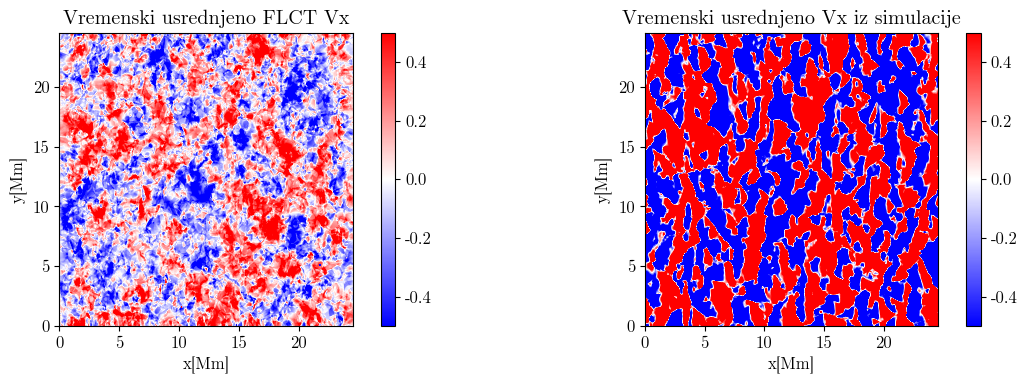

In [56]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim_log1[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv40_tau0_1.png", bbox_inches = 'tight', dpi = 100)

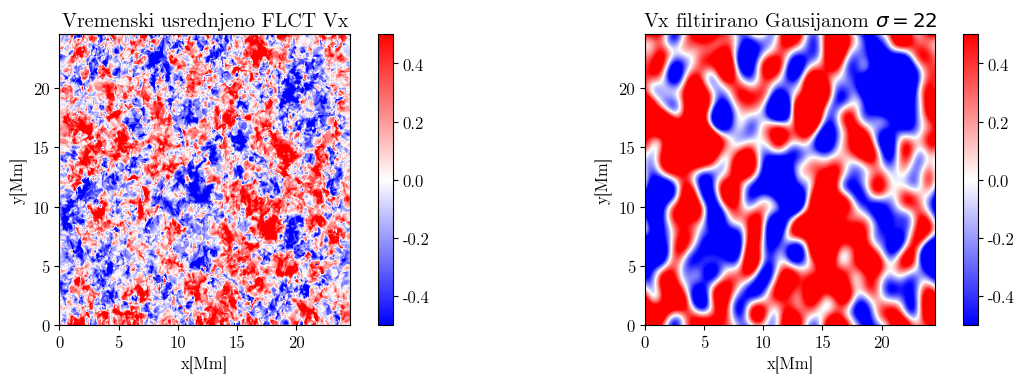

In [57]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxlog1_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv40_tau0_1.png", bbox_inches = 'tight', dpi = 100)

In [58]:
rxlog1_conv40_1 = pearsonr(Vx_conv40[0].flatten(), (Vx_bin_log1[0]/1E5).flatten()) 
print(rxlog1_conv40_1)

PearsonRResult(statistic=0.20129894478340157, pvalue=0.0)


In [59]:
rxlog1_conv40_2 = pearsonr(Vx_conv40_600.flatten(), Vx_mean_sim_log1.flatten()) 
print(rxlog1_conv40_2)

PearsonRResult(statistic=0.2278451299355506, pvalue=0.0)


In [60]:
rxlog1_conv40_3 = pearsonr(Vx_conv40_600.flatten(), Vxlog1_filtered22.flatten()) 
print(rxlog1_conv40_3)

PearsonRResult(statistic=0.34746343325457624, pvalue=0.0)


In [61]:
rylog1_conv40_1 = pearsonr(Vy_conv40[0].flatten(), (Vy_bin_log1[0]/1E5).flatten()) 
print(rylog1_conv40_1)

PearsonRResult(statistic=0.15228073602673944, pvalue=0.0)


In [62]:
rylog1_conv40_2 = pearsonr(Vy_conv40_600.flatten(), Vy_mean_sim_log1.flatten()) 
print(rylog1_conv40_2)

PearsonRResult(statistic=0.29448997748899053, pvalue=0.0)


In [63]:
rylog1_conv40_3 = pearsonr(Vy_conv40_600.flatten(), Vylog1_filtered22.flatten()) 
print(rylog1_conv40_3)

PearsonRResult(statistic=0.45948081072064484, pvalue=0.0)


<h2>FLCT velocities derived from line center vs velocities at $\tau$ = 1</h2>

In [64]:
Vx_log = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_log = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_log = Vx_log.transpose(0, 2, 1)
Vy_log = Vy_log.transpose(0, 2, 1)

In [65]:
Vx_log = Vx_log.reshape(361, 768, 2, 768, 2)
Vy_log = Vy_log.reshape(361, 768, 2, 768, 2)

In [66]:
Vx_bin_log = Vx_log.mean(axis = 4).mean(axis = 2)
Vy_bin_log = Vy_log.mean(axis = 4).mean(axis = 2)

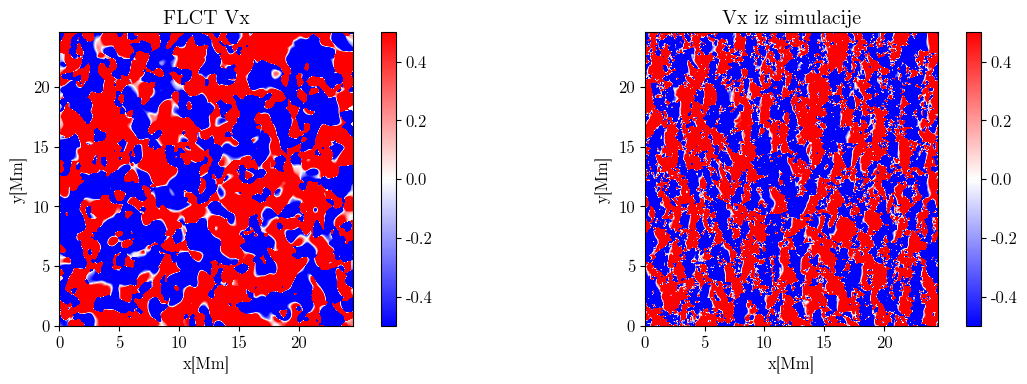

In [67]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40[0, :, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin_log[0, :, :]/1E5, origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Obicno_conv40_tau1.png", bbox_inches = 'tight', dpi = 100)

In [68]:
Vx_mean_sim_log = temporal_avg(Vx_bin_log, 0, 60)
Vx_mean_sim_log = Vx_mean_sim_log/1E5

Vy_mean_sim_log = temporal_avg(Vy_bin_log, 0, 60)
Vy_mean_sim_log = Vy_mean_sim_log/1E5

In [69]:
Vxlog_filtered22 = gaussian_filter(Vx_mean_sim_log, 22.5, mode = "wrap")
Vylog_filtered22 = gaussian_filter(Vy_mean_sim_log, 22.5, mode = "wrap")

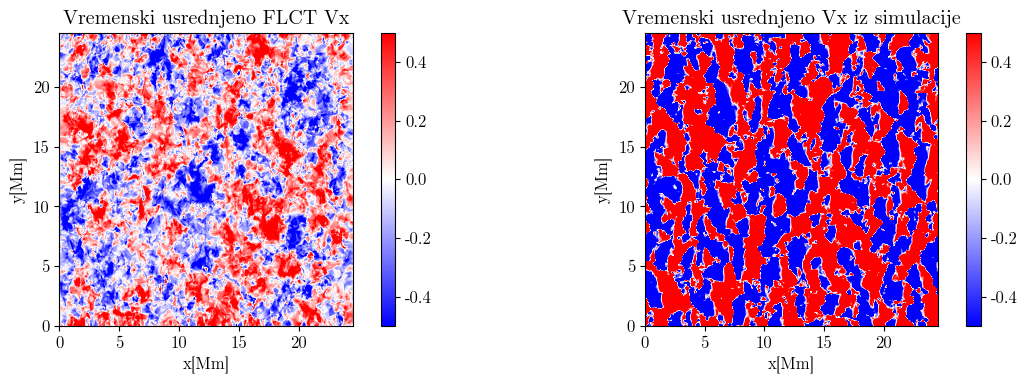

In [70]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_mean_sim_log[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vremenski usrednjeno Vx iz simulacije") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Time_conv40_tau1.png", bbox_inches = 'tight', dpi = 100)

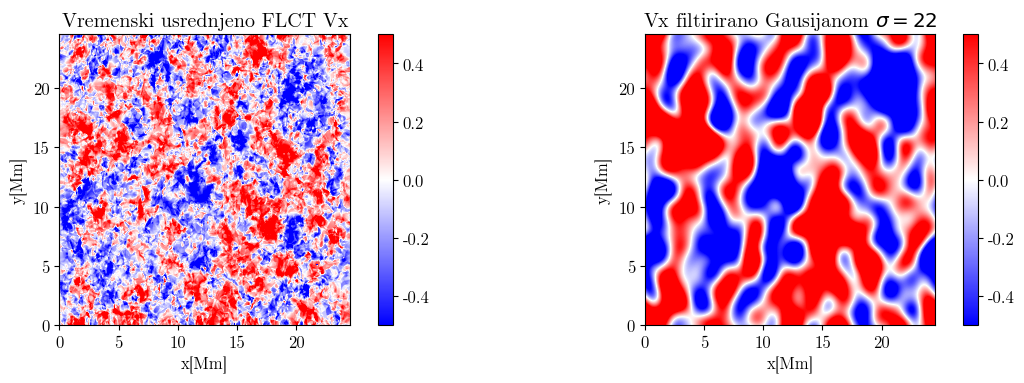

In [71]:
fig = plt.figure(figsize = (12,4))
#fig.suptitle("FLCT Vx i filtirano Vx iz simulacije; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(Vx_conv40_600[:, :], origin='lower',cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax1.set_title("Vremenski usrednjeno FLCT Vx") 
ax1.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vxlog_filtered22[:,:], origin='lower', cmap='bwr', extent = (0, 24.536, 0, 24.536), vmin = -0.5, vmax = 0.5)
ax2.set_title("Vx filtirirano Gausijanom $\sigma = 22$") 
ax2.set(xlabel = "x[Mm]", ylabel = "y[Mm]")
fig.colorbar(im2)
fig.tight_layout()
plt.savefig("Fin_conv40_tau1.png", bbox_inches = 'tight', dpi = 100)

In [72]:
rxlog_conv40_1 = pearsonr(Vx_conv40[0].flatten(), (Vx_bin_log[0]/1E5).flatten()) 
print(rxlog_conv40_1)

PearsonRResult(statistic=0.18487190111592416, pvalue=0.0)


In [73]:
rxlog_conv40_2 = pearsonr(Vx_conv40_600.flatten(), Vx_mean_sim_log.flatten()) 
print(rxlog_conv40_2)

PearsonRResult(statistic=0.2626931680130829, pvalue=0.0)


In [74]:
rxlog_conv40_3 = pearsonr(Vx_conv40_600.flatten(), Vxlog_filtered22.flatten()) 
print(rxlog_conv40_3)

PearsonRResult(statistic=0.364985909114416, pvalue=0.0)


In [75]:
rylog_conv40_1 = pearsonr(Vy_conv40[0].flatten(), (Vy_bin_log[0]/1E5).flatten()) 
print(rylog_conv40_1)

PearsonRResult(statistic=0.12443871958629182, pvalue=0.0)


In [76]:
rylog_conv40_2 = pearsonr(Vy_conv40_600.flatten(), Vy_mean_sim_log.flatten()) 
print(rylog_conv40_2)

PearsonRResult(statistic=0.34013130246124446, pvalue=0.0)


In [77]:
rylog_conv40_3 = pearsonr(Vy_conv40_600.flatten(), Vylog_filtered22.flatten()) 
print(rylog_conv40_3)

PearsonRResult(statistic=0.5052580375962877, pvalue=0.0)
